In [1]:
import pandas as pd
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\Srivalli\OneDrive\Desktop\sem 5\ml\mltill mid\dataset (1)\nba.csv")

In [3]:
df.sample(10)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
212,Jerryd Bayless,Milwaukee Bucks,19.0,PG,27.0,6-3,200.0,Arizona,3000000.0
436,Damian Lillard,Portland Trail Blazers,0.0,PG,25.0,6-3,195.0,Weber State,4236287.0
388,Danilo Gallinari,Denver Nuggets,8.0,SF,27.0,6-10,225.0,NaN,14000000.0
413,Nick Collison,Oklahoma City Thunder,4.0,PF,35.0,6-10,255.0,Kansas,3750000.0
87,Brandon Rush,Golden State Warriors,4.0,SF,30.0,6-6,220.0,Kansas,1270964.0
317,Lamar Patterson,Atlanta Hawks,13.0,SG,24.0,6-5,225.0,Pittsburgh,525093.0
197,Rakeem Christmas,Indiana Pacers,25.0,PF,24.0,6-9,250.0,Syracuse,1007026.0
245,Corey Brewer,Houston Rockets,33.0,SG,30.0,6-9,186.0,Florida,8229375.0
390,Nikola Jokic,Denver Nuggets,15.0,C,21.0,6-10,250.0,NaN,1300000.0
102,Pablo Prigioni,Los Angeles Clippers,9.0,PG,39.0,6-3,185.0,NaN,947726.0


In [4]:
df.isna().sum()

Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
dtype: int64

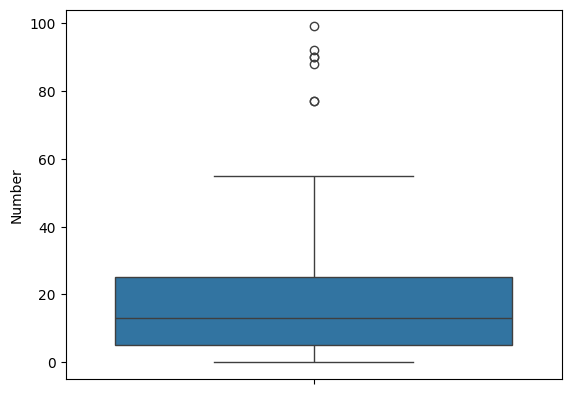

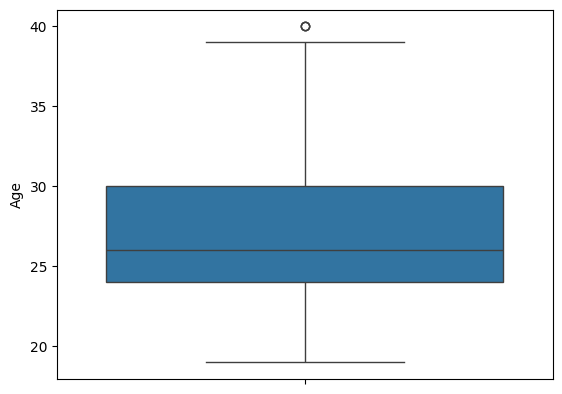

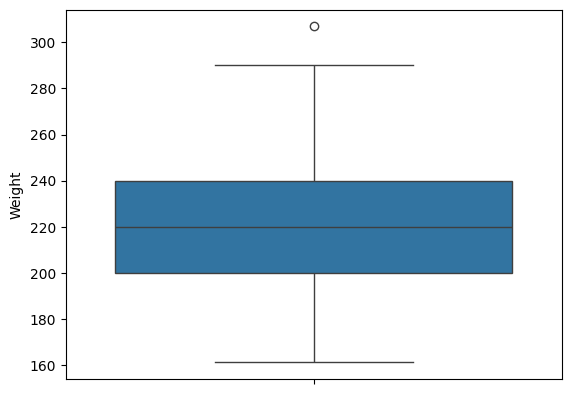

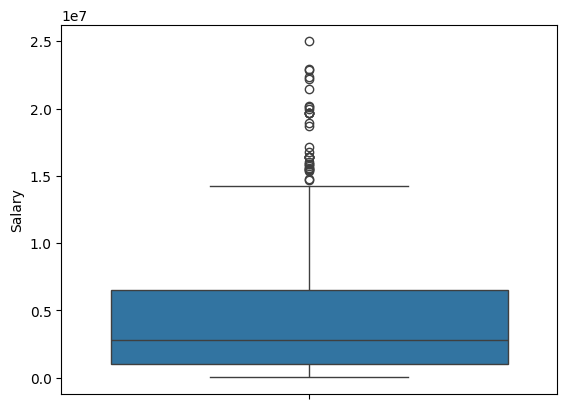

In [6]:
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(df[i])
    plt.show()

In [7]:
for col in df.select_dtypes(include='number').columns:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    upper=q3+1.5*iqr
    lower=q1-1.5*iqr
    df=df[(df[col]>=lower) & (df[col]<=upper)]
    

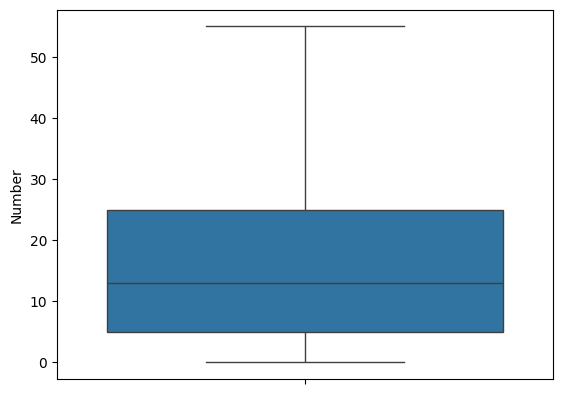

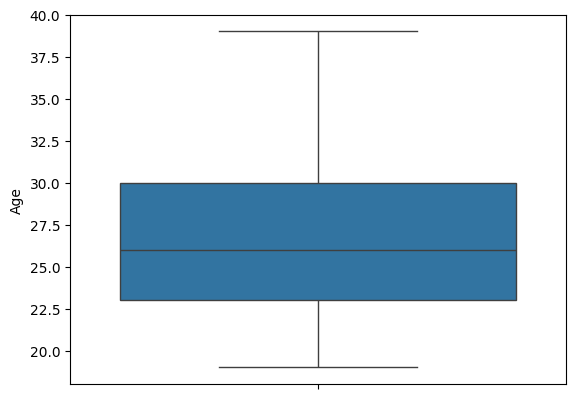

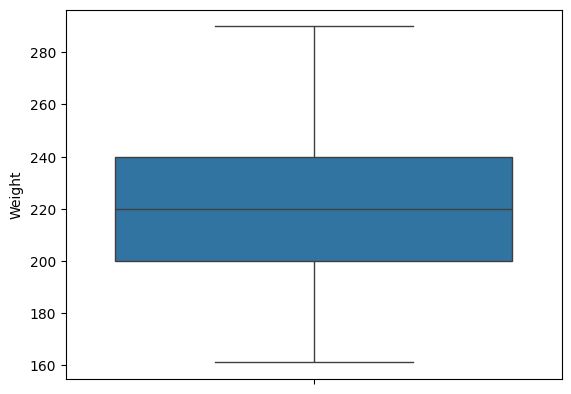

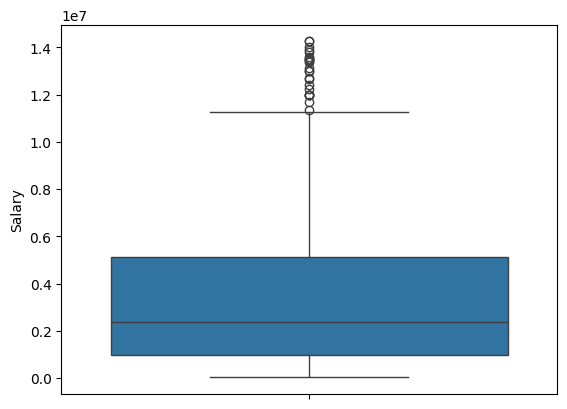

In [8]:
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(df[i])
    plt.show()

In [9]:
df.isna().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     71
Salary       0
dtype: int64

In [11]:
df1=df.copy()
df1=df1.dropna(axis=0)
df1.isna().sum()

Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64

In [13]:
df1.duplicated().sum()

np.int64(0)

In [14]:
df1.drop_duplicates(keep='first',inplace=True)

In [15]:
df1.sample(10)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
374,JJ Hickson,Washington Wizards,21.0,C,27.0,6-9,242.0,North Carolina State,273038.0
230,Raymond Felton,Dallas Mavericks,2.0,PG,31.0,6-1,205.0,North Carolina,3950313.0
79,Ian Clark,Golden State Warriors,21.0,SG,25.0,6-3,175.0,Belmont,947276.0
317,Lamar Patterson,Atlanta Hawks,13.0,SG,24.0,6-5,225.0,Pittsburgh,525093.0
183,Steve Blake,Detroit Pistons,22.0,PG,36.0,6-3,172.0,Maryland,2170465.0
267,P.J. Hairston,Memphis Grizzlies,19.0,SF,23.0,6-6,230.0,North Carolina,1201440.0
49,Joel Embiid,Philadelphia 76ers,21.0,C,22.0,7-0,250.0,Kansas,4626960.0
207,Rodney Stuckey,Indiana Pacers,2.0,PG,30.0,6-5,205.0,Eastern Washington,7000000.0
210,Joe Young,Indiana Pacers,1.0,PG,23.0,6-2,180.0,Oregon,1007026.0
36,Langston Galloway,New York Knicks,2.0,SG,24.0,6-2,200.0,Saint Joseph's,845059.0


In [16]:
df1['New_h']=df1["Height"].apply(lambda x: 12*int(x[:1])+ int(x[2:]) )
df1.drop('Height',inplace=True,axis=1)

In [17]:
df1.sample(10)

,Name,Team,Number,Position,Age,Weight,College,Salary,New_h
21,Sean Kilpatrick,Brooklyn Nets,6.0,SG,26.0,219.0,Cincinnati,134215.0,76
91,Cole Aldrich,Los Angeles Clippers,45.0,C,27.0,250.0,Kansas,1100602.0,83
376,Markieff Morris,Washington Wizards,5.0,PF,26.0,245.0,Kansas,8000000.0,82
307,Jonathon Simmons,San Antonio Spurs,17.0,SG,26.0,195.0,Houston,525093.0,78
9,Marcus Smart,Boston Celtics,36.0,PG,22.0,220.0,Oklahoma State,3431040.0,76
260,Matt Barnes,Memphis Grizzlies,22.0,SF,36.0,226.0,UCLA,3542500.0,79
257,Jordan Adams,Memphis Grizzlies,3.0,SG,21.0,209.0,UCLA,1404600.0,77
24,Chris McCullough,Brooklyn Nets,1.0,PF,21.0,200.0,Syracuse,1140240.0,83
218,O.J. Mayo,Milwaukee Bucks,3.0,SG,28.0,210.0,USC,8000000.0,77
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,180.0,Texas,7730337.0,74


In [18]:
from sklearn import preprocessing

label=preprocessing.LabelEncoder()

df1['Name']=label.fit_transform(df1['Name'])
df1['Team']=label.fit_transform(df1['Team'])
df1['College']=label.fit_transform(df1['College'])


In [19]:
df1.sample(10)

,Name,Team,Number,Position,Age,Weight,College,Salary,New_h
166,212,5,8.0,PG,25.0,198.0,79,1147276.0,76
105,41,12,30.0,SG,25.0,195.0,101,1159680.0,77
92,136,12,19.0,PF,29.0,250.0,2,111444.0,81
276,270,18,33.0,PF,28.0,240.0,11,8500000.0,82
177,107,5,4.0,SG,25.0,220.0,32,8988765.0,77
75,73,27,55.0,PG,24.0,190.0,93,1509360.0,77
12,92,1,11.0,SG,27.0,220.0,67,3425510.0,79
281,20,18,23.0,PF,23.0,253.0,43,7070730.0,82
452,308,28,41.0,PF,20.0,234.0,43,2239800.0,82
50,140,22,39.0,SF,22.0,210.0,83,845059.0,80


In [22]:
from sklearn.preprocessing import OrdinalEncoder

ord=OrdinalEncoder()

df1['Position']=ord.fit_transform(df1[['Position']])

In [23]:
df1.sample(10)

,Name,Team,Number,Position,Age,Weight,College,Salary,New_h
9,203,1,36.0,2.0,22.0,220.0,68,3431040.0,76
456,139,28,24.0,0.0,26.0,231.0,41,947276.0,84
446,75,28,15.0,1.0,24.0,265.0,32,12000000.0,82
347,165,15,0.0,4.0,22.0,200.0,85,525093.0,78
18,267,2,24.0,4.0,21.0,220.0,1,1335480.0,79
224,224,16,18.0,0.0,27.0,249.0,24,2109294.0,83
227,168,6,1.0,4.0,22.0,228.0,97,1449000.0,78
392,221,7,3.0,4.0,36.0,218.0,26,947276.0,80
368,6,29,6.0,4.0,33.0,220.0,55,4000000.0,78
44,76,19,23.0,1.0,25.0,240.0,1,4000000.0,80


In [24]:
df2=df1.pop('Salary')
df1['Salary']=df2
df1.sample(10)

,Name,Team,Number,Position,Age,Weight,College,New_h,Salary
87,35,9,4.0,3.0,30.0,220.0,41,78,1270964.0
122,77,23,1.0,4.0,19.0,206.0,43,78,2127840.0
91,57,12,45.0,0.0,27.0,250.0,41,83,1100602.0
0,27,1,0.0,2.0,25.0,180.0,87,74,7730337.0
127,34,23,3.0,2.0,24.0,189.0,43,75,13500000.0
31,197,19,17.0,1.0,33.0,220.0,91,81,1635476.0
44,76,19,23.0,1.0,25.0,240.0,1,80,4000000.0
307,155,26,17.0,4.0,26.0,195.0,35,78,525093.0
245,58,10,33.0,4.0,30.0,186.0,26,81,8229375.0
57,110,22,1.0,2.0,27.0,175.0,100,72,947276.0


In [25]:
from sklearn.preprocessing import MinMaxScaler

array=df1.values
x=array[:,0:8]
y=array[:,8]

scaler=MinMaxScaler(feature_range=(0,1))
rescaled=scaler.fit_transform(x)
np.set_printoptions(precision=3)
rescaled[0:5,:]

array([[0.082, 0.034, 0.   , 0.5  , 0.3  , 0.161, 0.784, 0.312],
       [0.765, 0.034, 0.509, 1.   , 0.15 , 0.203, 0.279, 0.5  ],
       [0.491, 0.034, 1.   , 0.25 , 0.1  , 0.627, 0.396, 0.688],
       [0.527, 0.034, 0.745, 0.   , 0.3  , 0.653, 0.297, 0.938],
       [0.902, 0.034, 0.218, 0.5  , 0.15 , 0.246, 0.432, 0.312]])

In [26]:
df1.columns

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Weight', 'College',
       'New_h', 'Salary'],
      dtype='object')

In [98]:
x=df1[[ 'Position', 'Age','College',
       ]].values
y=df1['Salary'].values

In [99]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=0)

In [100]:
xtest

array([[  0.,  31.,  26.],
       [  3.,  30.,  41.],
       [  3.,  23.,  96.],
       [  1.,  29.,  63.],
       [  1.,  26.,  41.],
       [  3.,  32.,   1.],
       [  4.,  24.,  99.],
       [  4.,  26.,  14.],
       [  2.,  36.,  51.],
       [  3.,  20.,   1.],
       [  3.,  30.,   7.],
       [  4.,  25.,   5.],
       [  4.,  24.,  77.],
       [  0.,  27.,  41.],
       [  3.,  29.,   0.],
       [  3.,  34.,   3.],
       [  1.,  25., 107.],
       [  4.,  25.,  24.],
       [  2.,  28.,  21.],
       [  2.,  25.,  72.],
       [  3.,  25.,  46.],
       [  1.,  27.,  97.],
       [  4.,  22.,  97.],
       [  4.,  32.,  96.],
       [  4.,  33., 105.],
       [  4.,  30.,  32.],
       [  4.,  24.,  11.],
       [  4.,  28.,  63.],
       [  2.,  28.,  87.],
       [  2.,  31.,  65.],
       [  4.,  38.,   1.],
       [  1.,  28., 101.],
       [  3.,  22.,  90.],
       [  2.,  27., 101.],
       [  0.,  24.,  67.],
       [  2.,  24.,  93.],
       [  1.,  29.,  76.],
 

In [101]:
ytest

array([13400000.,  1270964.,   600000.,  7000000.,  5000000., 11710456.,
         561716.,   134215.,  2170465.,  2841960.,  4375000.,   947276.,
         845059.,  1100602.,  1320000.,   261894.,   845059.,   947276.,
       11370786.,   845059.,   845059.,  3333333.,  1449000.,  3135000.,
         200600.,  3344000.,   947276., 10000000.,  3000000.,  4290000.,
         947276.,  6110034.,  1142880.,  6912869.,  2569260.,  1509360.,
         245177., 11235955.,  2380440.,  1131960., 11250000.,   947276.,
        2500000.,  4300000.,  1500000.,   525093.,  1007026.,  6600000.,
          83397.,  2250000.,  1140240.,   845059.,  7085000., 10151612.,
        5500000.,  5158539.,  5758680.,   845059.,   700000.,  6980802.,
         211744.,   947276.,   947276.,  6268675.,   189455., 10595507.])

In [102]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()

model.fit(xtrain,ytrain)

LinearRegression()

In [103]:
ypred=model.predict(xtest)
ypred

array([4615886.009, 3838809.89 , 2658023.003, 3993490.467, 3685661.929,
       4281813.645, 2587040.357, 3225781.542, 4794798.418, 2667724.072,
       3986700.392, 3130421.563, 2682734.211, 4012610.341, 3882640.972,
       4542129.132, 3264072.901, 3047776.871, 3849230.322, 3223872.175,
       3144523.964, 3576585.036, 2326724.869, 3676149.234, 3771509.212,
       3685516.427, 2969815.775, 3281660.158, 3562148.759, 4061365.007,
       4896417.483, 3693693.618, 2549613.862, 3366745.205, 3495995.211,
       2998020.577, 3936944.099, 3859316.879, 3123109.237, 2280598.933,
       3521759.659, 3557799.038, 4602169.095, 4323735.361, 3281660.158,
       3134437.408, 2963556.688, 3853246.167, 3265793.892, 4039616.403,
       2830436.339, 3194091.883, 3854821.657, 4047262.605, 3773230.204,
       4066956.341, 2435801.762, 2801563.784, 2718919.092, 3916916.487,
       3666542.055, 2591390.077, 3876048.009, 3811469.952, 3758220.065,
       3145577.204])

In [104]:
from sklearn.metrics import r2_score

r2=r2_score(ytest,ypred)
r2

0.08557123402317135